In [1]:
# %tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)




2.3.1
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

详见 https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb

~~~python
def load_data(path='imdb.npz',
              num_words=None,
              skip_top=0,
              maxlen=None,
              seed=113,
              start_char=1,
              oov_char=2,
              index_from=3,
              **kwargs):
~~~

In [1]:
# Import imdb

from tensorflow.keras.datasets import imdb
import numpy as np
from collections import Counter

In [2]:
# Download and assign the data set using load_data()

# by convention, use 2 as OOV word
# reserve 'index_from' (=3 by default) characters:
# 0 (padding), 1 (start), 2 (OOV)

(x_train, y_train), (x_test, y_test) = imdb.load_data()
word_index = imdb.get_word_index()
index_word = {value:key for key,value in word_index.items()}

17465344/17464789 [==============================] - 2s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
for i in range(5):
    print('-'*50)
    print(x_train[i])

--------------------------------------------------
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345

#### Inspect the dataset

In [ ]:
# Inspect the type of the data

print(type(x_train), type(y_train))
print(type(word_index))
print(type(index_word))

In [ ]:
# Inspect the shape of the data

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(len(word_index))



可以发现每段文本，开头的字符都是start_char（默认是1）

~~~python

  if start_char is not None:
    x_train = [[start_char] + [w + index_from for w in x] for x in x_train]
    x_test = [[start_char] + [w + index_from for w in x] for x in x_test]
  elif index_from:
    x_train = [[w + index_from for w in x] for x in x_train]
    x_test = [[w + index_from for w in x] for x in x_test]

~~~

In [ ]:
# Display the first dataset element input
# Notice encoding

print(x_train[0])
print('-'*50)

print(min(word_index.values()), max(word_index.values()))
print(type(index_word))

print('-'*50)
print(1, index_word[1])
print(88584, index_word[88584])

print('-'*50)
i=0
for key, value in index_word.items():
    if i>=10: break;
    print(key, value)
    i = i + 1

In [ ]:
# Display the first dataset element output

print(y_train[0])

#### Load dataset with different options


可以发现index_from默认是3，它会改变词的index。

~~~python

  if start_char is not None:
    x_train = [[start_char] + [w + index_from for w in x] for x in x_train]
    x_test = [[start_char] + [w + index_from for w in x] for x in x_test]
  elif index_from:
    x_train = [[w + index_from for w in x] for x in x_train]
    x_test = [[w + index_from for w in x] for x in x_test]

~~~

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()
print(min([min([ w for w in x if w>2 ]) for x in x_train]))

# Load the dataset with defaults
# 默认路径 ~/.keras/datasets/
(x_train, y_train), (x_test, y_test) = imdb.load_data('imdb.npz', index_from=4)

print(min([min([w for w in x if w>2]) for x in x_train]))

NameError: name 'imdb' is not defined

In [ ]:
' '.join([index_word[i+4] for i in x_train[5] if i>2])

In [ ]:
c = Counter()
for x in x_train:
    c.update(x)
print(len(c.keys()))
c.most_common(20)

可以发现下面单词列表是根据词频来排序的。

~~~python
  # by convention, use 2 as OOV word
  # reserve 'index_from' (=3 by default) characters:
  # 0 (padding), 1 (start), 2 (OOV)
  if oov_char is not None:
    xs = [
        [w if (skip_top <= w < num_words) else oov_char for w in x] for x in xs
    ]
  else:
    xs = [[w for w in x if skip_top <= w < num_words] for x in xs]
    
~~~

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)
print(x_train[0])

c = Counter()
for x in x_train:
    c.update(x)
print(len(c.keys()))
c.most_common(20)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=10, num_words=500)
print(x_train[0])

c = Counter()
for x in x_train:
    c.update(x)
print(len(c.keys()))
c.most_common(20)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=10, num_words=500, maxlen=500)

c = Counter()
for x in x_train:
    c.update(x)
print(len(c.keys()))
c.most_common(20)

In [ ]:
 # Use '1' as the character that indicates the start of a sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(start_char=5)

c = Counter()
for x in x_train:
    c.update(x)
print(len(c.keys()))
c.most_common(20)

#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()
index_from = 3
(x_train, y_train), (x_test, y_test) = imdb.load_data(index_from=index_from)

word_index = imdb.get_word_index()


In [ ]:
# View the word index as a dictionary,
# accounting for index_from.

word_index = {key:value+index_from for key,value in word_index.items()}


In [ ]:
# Retrieve a specific word's index

word_index['movie']

In [ ]:
# View an input sentence
# 从数据上看，1表示zpositive，0表示negative

index_word = {value:key for key,value in word_index.items()}

for i in range(10):
    print('-'*50)
    print(y_train[i], ":",  ' '.join([index_word[i] for i in x_train[i] if i>index_from]))

In [ ]:
# Get the sentiment value

print(y_train[5])

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [8]:
# Load the imdb data set

index_from = 3
(x_train, y_train), (x_test, y_test) = imdb.load_data(index_from=index_from)

word_index = imdb.get_word_index()
word_index = {key:value+index_from for key,value in word_index.items()}
index_word = {value:key for key,value in word_index.items()}

NameError: name 'imdb' is not defined

#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape

print(x_train.shape)
for i in range(10):
    print(i, len(x_train[i]))

In [ ]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [ ]:
# Inspect the output data shape
print(padded_x_train.shape)
for i in range(10):
    print(i, len(padded_x_train[i]))

print('-'*50)
print(padded_x_train[0])  
print('-'*50)
print(x_train[0]) 

print('-'*50)
print(padded_x_train[3])   
print('-'*50)
print(x_train[3])

#### Create a Masking layer



看起来maskting层，是根据最后两层的内容，来建立mask的，感觉最后一层好像图像是channel。其处理代码如下

~~~python
def call(self, inputs):
    boolean_mask = K.any(
        math_ops.not_equal(inputs, self.mask_value), axis=-1, keepdims=True)
    outputs = inputs * math_ops.cast(boolean_mask, inputs.dtype)
    # Compute the mask and outputs simultaneously.
    outputs._keras_mask = array_ops.squeeze(boolean_mask, axis=-1)  # pylint: disable=protected-access
    return outputs

~~~

In [ ]:
# Import numpy 

import numpy as np

In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)


In [ ]:
print(padded_x_train.shape)

In [ ]:
# Create a Masking layer 

masking_layer = tf.keras.layers.Masking(mask_value=0)

In [ ]:
# Pass tf_x_train to it

masked_x_train = masking_layer(padded_x_train)

In [ ]:
# Look at the dataset

masked_x_train[0]

In [ ]:
# Look at the ._keras_mask for the dataset

print(masked_x_train._keras_mask.shape)
masked_x_train._keras_mask[0]

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

https://keras.io/zh/layers/embeddings/

**参数**

- **input_dim**: int > 0。词汇表大小， 即，最大整数 index + 1。
- **output_dim**: int >= 0。词向量的维度。
- **embeddings_initializer**: `embeddings` 矩阵的初始化方法 (详见 [initializers](https://keras.io/zh/initializers/))。
- **embeddings_regularizer**: `embeddings` matrix 的正则化方法 (详见 [regularizer](https://keras.io/zh/regularizers/))。
- **embeddings_constraint**: `embeddings` matrix 的约束函数 (详见 [constraints](https://keras.io/zh/constraints/))。
- **mask_zero**: 是否把 0 看作为一个应该被遮蔽的特殊的 "padding" 值。 这对于可变长的 [循环神经网络层](https://keras.io/zh/layers/recurrent/) 十分有用。 如果设定为 `True`，那么接下来的所有层都必须支持 masking，否则就会抛出异常。 如果 mask_zero 为 `True`，作为结果，索引 0 就不能被用于词汇表中 （input_dim 应该与 vocabulary + 1 大小相同）。
- **input_length**: 输入序列的长度，当它是固定的时。 如果你需要连接 `Flatten` 和 `Dense` 层，则这个参数是必须的 （没有它，dense 层的输出尺寸就无法计算）
。

**输入尺寸**

尺寸为 `(batch_size, sequence_length)` 的 2D 张量。

**输出尺寸**

尺寸为 `(batch_size, sequence_length, output_dim)` 的 3D 张量。

#### Create and apply an `Embedding` layer

In [9]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [10]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
print(sequence_of_indices.shape)
sequence_of_embeddings = embedding_layer(sequence_of_indices)

print(sequence_of_embeddings.shape)

(1, 4, 1)
(1, 4, 1, 16)


In [11]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0].shape


(501, 16)

In [12]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14]

array([ 0.02454586, -0.00432748, -0.00028656,  0.03896247, -0.02466898,
        0.00436393, -0.03010212,  0.03159023, -0.01604318, -0.03909466,
       -0.0146222 , -0.02455685,  0.01654196,  0.01164547, -0.01700195,
       -0.04154638], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [13]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [14]:
# Apply this layer to the sequence and see the _keras_mask property


masking_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masking_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Load and preprocess the IMDb data

In [16]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [17]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [18]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [19]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [20]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}


In [21]:
x_train[0]

array([  0,   0,   0, ...,  18, 177,  31], dtype=int32)

In [22]:
# View the first dataset example sentence

' '.join([inv_imdb_word_index[i] for i in x_train[0] if i>=index_from])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole 

#### Build an Embedding layer into a model

In [23]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())
max_index_value

10000

In [24]:
# Specify an embedding dimension
embedding_dim =16
print(max_index_value)

10000


In [25]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None, ))
embedding_sequene = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequene)
positive_probabilty = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)
model = tf.keras.Model(inputs =review_sequence, outputs = positive_probabilty )

In [27]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [28]:
# Compile the model with a binary cross-entropy loss

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 0.6896 - accuracy: 0.5702 - val_loss: 0.6826 - val_accuracy: 0.6500
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.6659 - accuracy: 0.6997 - val_loss: 0.6434 - val_accuracy: 0.7516
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 0.6180 - accuracy: 0.7604 - val_loss: 0.5899 - val_accuracy: 0.7547
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 0.5650 - accuracy: 0.7970 - val_loss: 0.5409 - val_accuracy: 0.7891
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.5151 - accuracy: 0.8242 - val_loss: 0.4987 - val_accuracy: 0.8094


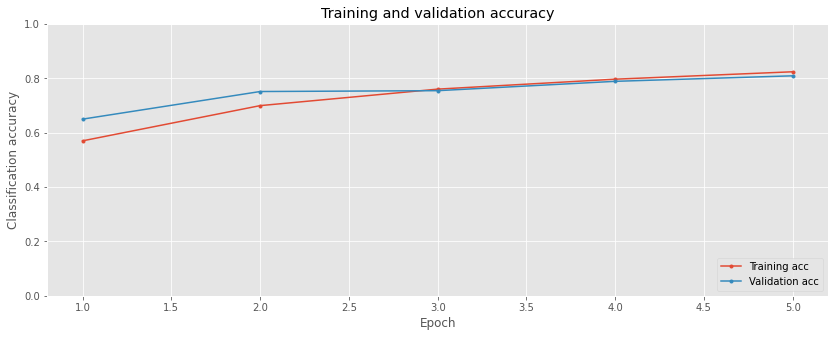

In [30]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [31]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]
print(weights.shape)

(10001, 16)


In [32]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [38]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [39]:
# Note that only the final cell output is returned
sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100]]])
print(sequence.shape)
layer_output = simplernn_layer(sequence)
print(layer_output)
print(layer_output.shape)

(1, 3, 2)
tf.Tensor(
[[ 1.          1.          1.          1.          1.         -1.
   1.          0.9944205  -1.          1.         -0.9679608  -1.
   1.          1.         -0.99999994 -1.        ]], shape=(1, 16), dtype=float32)
(1, 16)


#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [40]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(17121, 249) (17121,)
(17588, 249) (17588,)


In [85]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [86]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [87]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [76]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

for weights in model.weights:
    print(weights.shape)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 162,145
Trainable params: 162,145
Non-trainable params: 0
_________________________________________________________________
(10001, 16)
(16, 64)
(16, 64)
(64,)
(16, 1)
(1,)


#### Compile and fit the model

In [77]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [80]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/3
536/536 [==============================] - 331s 617ms/step - loss: 0.3366 - accuracy: 0.8626 - val_loss: 0.3187 - val_accuracy: 0.8699
Epoch 2/3
536/536 [==============================] - 331s 617ms/step - loss: 0.2481 - accuracy: 0.9042 - val_loss: 0.3311 - val_accuracy: 0.8587
Epoch 3/3
536/536 [==============================] - 330s 616ms/step - loss: 0.2061 - accuracy: 0.9249 - val_loss: 0.3103 - val_accuracy: 0.8752


#### Plot learning curves

In [81]:
history.history

{'loss': [0.3365969657897949, 0.24811486899852753, 0.2060793936252594],
 'accuracy': [0.8626248240470886, 0.9041528105735779, 0.9248875379562378],
 'val_loss': [0.31867149472236633, 0.33108457922935486, 0.3102601170539856],
 'val_accuracy': [0.8698544502258301, 0.8587104678153992, 0.875199019908905]}

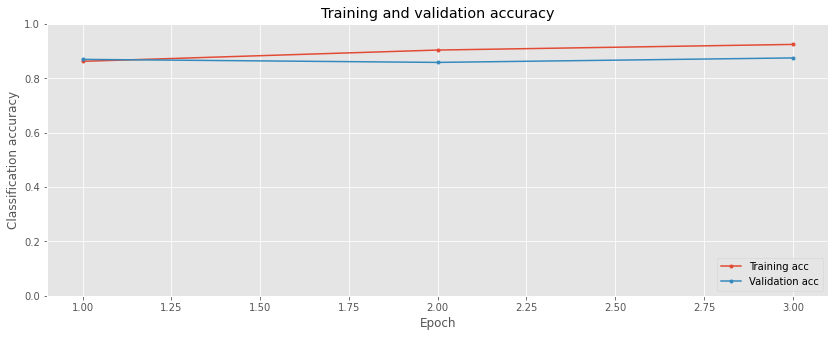

In [82]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [94]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
' '.join([inv_imdb_word_index[index] for index in x_test[0] if index>=index_from])

"please give this one a miss br br and the rest of the cast terrible performances the show is flat flat flat br br i don't know how michael could have allowed this one on his he almost seemed to know this wasn't going to work out and his performance was quite so all you fans give this a miss"

In [98]:
# Get the model prediction using model.predict()

predictions = model.predict(x_test[None, 0, :])
print(predictions)

[[0.19003934]]


In [99]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [151]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [152]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [153]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    max_index_value = max(imdb_word_index.values())
    min_index_value = min(imdb_word_index.values())
    print(max_index_value)
    print(min_index_value)    
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [154]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

88584
1


#### Build stacked and bidirectional recurrent models

In [155]:
# Get the maximum index value and specify an embedding dimension
max_index_value = max(imdb_word_index.values())
min_index_value = min(imdb_word_index.values())
embedding_dim = 16
print(max_index_value)
print(min_index_value)
print(len(imdb_word_index.values()))

5000
3
4998


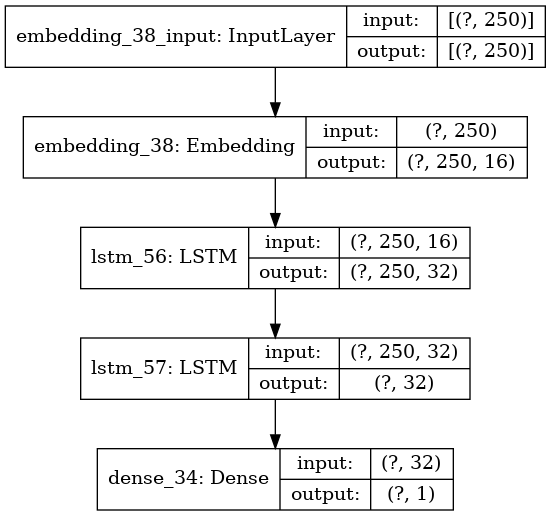

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 250, 16)           80016     
_________________________________________________________________
lstm_56 (LSTM)               (None, 250, 32)           6272      
_________________________________________________________________
lstm_57 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 94,641
Trainable params: 94,641
Non-trainable params: 0
_________________________________________________________________
(5001, 16)
(16, 128)
(32, 128)
(128,)
(32, 128)
(32, 128)
(128,)
(32, 1)
(1,)
(None, 250) (None, 250, 16)
(None, 250, 16) (None, 250, 32)
(None, 250, 32) (None, 32)
(None, 32) (None, 1)


In [156]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
from IPython.display import display
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, input_length=250, mask_zero=True),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
display(tf.keras.utils.plot_model(model, 'data/stacked.png', show_shapes=True))
model.summary()

for weights in model.weights:
    print(weights.shape)

for layer in model.layers:
    print(layer.input.shape, layer.output.shape)


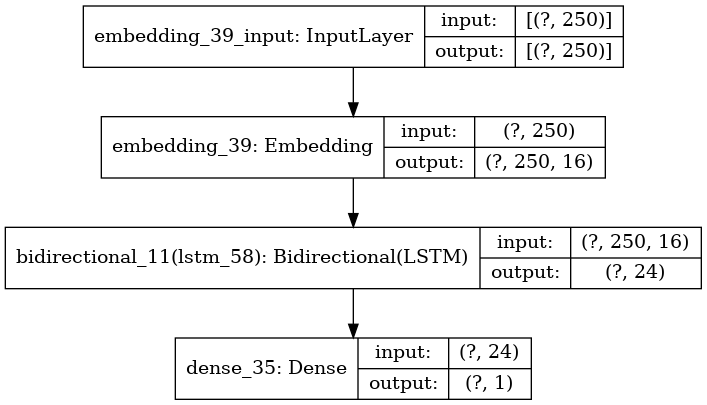

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 250, 16)           80016     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 24)                2432      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 25        
Total params: 82,473
Trainable params: 82,473
Non-trainable params: 0
_________________________________________________________________
(5001, 16)
(16, 32)
(8, 32)
(32,)
(16, 48)
(16, 48)
(2, 48)
(24, 1)
(1,)
(None, 250) (None, 250, 16)
(None, 250, 16) (None, 24)
(None, 24) (None, 1)


In [157]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

from IPython.display import display
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer= tf.keras.layers.LSTM(units=8), 
                                  backward_layer=tf.keras.layers.GRU(units=16, go_backwards=True), merge_mode="concat"),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
display(tf.keras.utils.plot_model(model, 'data/stacked.png', show_shapes=True))
model.summary()

for weights in model.weights:
    print(weights.shape)

for layer in model.layers:
    print(layer.input.shape, layer.output.shape)

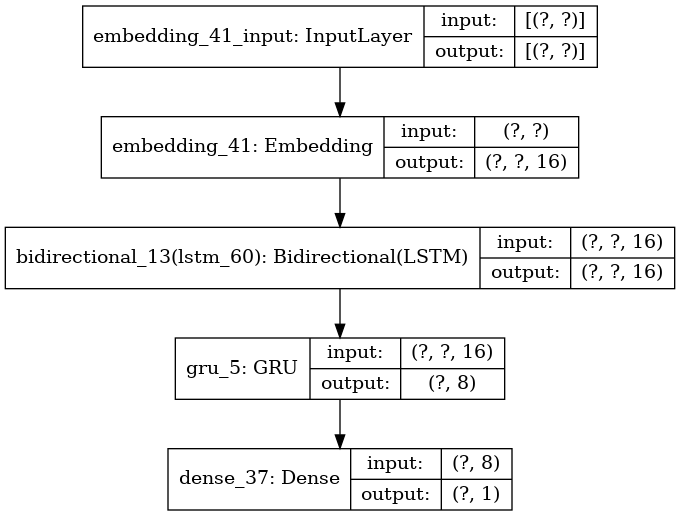

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, None, 16)          80016     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, None, 16)          1600      
_________________________________________________________________
gru_5 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 82,249
Trainable params: 82,249
Non-trainable params: 0
_________________________________________________________________
(5001, 16)
(16, 32)
(8, 32)
(32,)
(16, 32)
(8, 32)
(32,)
(16, 24)
(8, 24)
(2, 24)
(8, 1)
(1,)
(None, None) (None, None, 16)
(None, None, 16) (None, None, 16)
(None, None, 16) (None, 8)
(None, 8) (None, 1)


In [162]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

from IPython.display import display
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.GRU(units=8),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
display(tf.keras.utils.plot_model(model, 'data/stacked.png', show_shapes=True))
model.summary()

for weights in model.weights:
    print(weights.shape)

for layer in model.layers:
    print(layer.input.shape, layer.output.shape)

#### Compile and fit the model

In [163]:
print(max_index_value)

5000


In [164]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [166]:
# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/3
536/536 [==============================] - 796s 1s/step - loss: 0.4079 - accuracy: 0.8042 - val_loss: 0.3151 - val_accuracy: 0.8718
Epoch 2/3
536/536 [==============================] - 791s 1s/step - loss: 0.2445 - accuracy: 0.9063 - val_loss: 0.3039 - val_accuracy: 0.8775
Epoch 3/3
536/536 [==============================] - 790s 1s/step - loss: 0.1840 - accuracy: 0.9344 - val_loss: 0.3195 - val_accuracy: 0.8742


In [169]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 700s 1s/step - loss: 0.1484 - accuracy: 0.9486
Epoch 2/3
536/536 [==============================] - 701s 1s/step - loss: 0.1133 - accuracy: 0.9630
Epoch 3/3
536/536 [==============================] - 701s 1s/step - loss: 0.0939 - accuracy: 0.9694


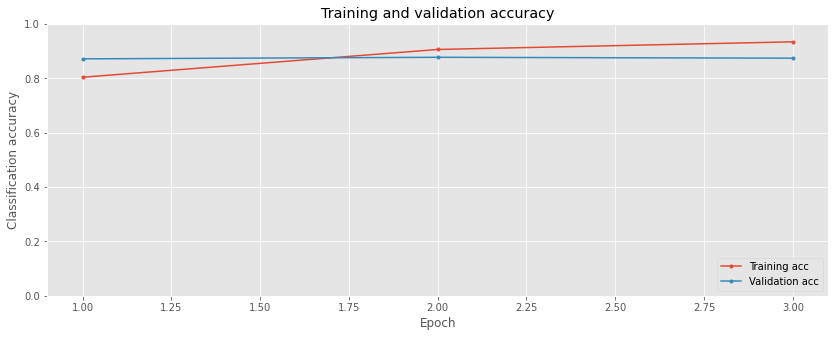

In [168]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

60

In [250]:
import numpy as np
import tensorflow as tf
from  tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional


def get_weights_count(layer):
    return np.sum([np.prod(weight.shape) for weight in layer.weights])

def show_info(output_shape, weight_number):
    print('     output.shape =', output_shape)
    print('     weight_number =', weight_number)
    
        

print('='*50 +'\n' + 'Embedding(input_dim=1001, output_dim=16)')
model = tf.keras.Sequential([
   Embedding(input_dim=1001, output_dim=16)
])
show_info(model.layers[0].output.shape, get_weights_count(model.layers[0]))

print('='*50+'\n' + 'Embedding(input_dim=1001, output_dim=16, input_length=100)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16, input_length=100)
])
show_info(model.layers[0].output.shape, get_weights_count(model.layers[0]))

print('='*50+'\n' + 'SimpleRNN(units=32)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16),
    SimpleRNN(units=32),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))

print('='*50+'\n' + 'SimpleRNN(units=32, return_sequences=True)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001,  output_dim=16),
    SimpleRNN(units=32, return_sequences=True),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))


print('='*50+'\n' + 'SimpleRNN(units=32, return_sequences=True) with sequence_length=100')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16, input_length=100),
    SimpleRNN(units=32, return_sequences=True),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))


print('='*50+'\n' + 'Bidirectional(layer= SimpleRNN(units=32), merge_mode="concat")')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16),
    Bidirectional(layer= SimpleRNN(units=32), merge_mode="concat")
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))


print('='*50+'\n' + 'LSTM(units=32)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16),
    LSTM(units=32),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))


print('='*50+'\n' + 'GRU(units=32)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16),
    GRU(units=32),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))

print('='*50+'\n' + 'GRU(units=32, reset_after=False)')
model = tf.keras.Sequential([
    Embedding(input_dim=1001, output_dim=16),
    GRU(units=32, reset_after=False),
])
show_info(model.layers[1].output.shape, get_weights_count(model.layers[1]))


print('='*50+'\n' + 'LSTM(units=32, stateful=True, batch_input_shape=(4, 100, 16))')
model = tf.keras.Sequential([
    LSTM(units=32, stateful=True, batch_input_shape=(4, None, 16)),
])
show_info(model.layers[0].output.shape, get_weights_count(model.layers[0]))

print('='*50+'\n' + 'LSTM(units=32, return_sequences=True, stateful=True, batch_input_shape=(4, None, 16))')
model = tf.keras.Sequential([
    LSTM(units=32, return_sequences=True, stateful=True, batch_input_shape=(4, None, 16)),
])
show_info(model.layers[0].output.shape, get_weights_count(model.layers[0]))

print('='*50+'\n' + 'LSTM(units=32, return_sequences=True, stateful=True, batch_input_shape=(4, 100, 16)),')
model = tf.keras.Sequential([
    LSTM(units=32, return_sequences=True, stateful=True, batch_input_shape=(4, 100, 16)),
])
show_info(model.layers[0].output.shape, get_weights_count(model.layers[0]))

Embedding(input_dim=1001, output_dim=16)
     output.shape = (None, None, 16)
     weight_number = 16016
Embedding(input_dim=1001, output_dim=16, input_length=100)
     output.shape = (None, 100, 16)
     weight_number = 16016
SimpleRNN(units=32)
     output.shape = (None, 32)
     weight_number = 1568
SimpleRNN(units=32, return_sequences=True)
     output.shape = (None, None, 32)
     weight_number = 1568
SimpleRNN(units=32, return_sequences=True) with sequence_length=100
     output.shape = (None, 100, 32)
     weight_number = 1568
Bidirectional(layer= SimpleRNN(units=32), merge_mode="concat")
     output.shape = (None, 64)
     weight_number = 3136
LSTM(units=32)
     output.shape = (None, 32)
     weight_number = 6272
GRU(units=32)
     output.shape = (None, 32)
     weight_number = 4800
GRU(units=32, reset_after=False)
     output.shape = (None, 32)
     weight_number = 4704
LSTM(units=32, stateful=True, batch_input_shape=(4, 100, 16))
     output.shape = (4, 32)
     weight_numbe